In [35]:
import pandas as pd
from CompareGroupsFunctions import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.markers import MarkerStyle
import matplotlib.lines as mlines

plt.rcParams.update({'mathtext.fontset': 'dejavusans'})

ano = '2019'

In [2]:
feat_map = {'Gender': {'gp_feat':'TP_SEXO',
                       'gp_map':{'M':'Masculino', 'F': 'Feminino'},
                       'gp_name':'sexo',
                       'gps':None
                      },
            'Race':   {'gp_feat':'TP_COR_RACA',
                       'gp_name':'raca',
                       'gp_map':{0:'ND', 1: 'Branca', 2: 'Preta', 3:'Parda', 4:'Amarela', 5:'Indigena'},
                       'gps':[1, 2, 3]
                      },
            'Income': {'gp_feat':'CLASSE', 
                       'gp_name':'classe', 
                       'gp_map':{'alta': '2+ MW',
                                  'média': '1/2-2 MW',
                                  'baixa': '0-1/2 MW'
                                  },
                       'gps':None
                      }
           }

In [3]:
def all_groups_std_df(comp, ano, item_ing=None, item_esp=None):
    if comp!='LC':
        auc_std_ch = pd.DataFrame()
        auc_fav_ch = pd.DataFrame()

        for feat in ['Gender','Race','Income']:
            ch_comp = GroupComparator(comp=comp, ano=ano, 
                                          gp_feat = feat_map[feat]['gp_feat'], 
                                          gp_name = feat_map[feat]['gp_name'], 
                                          gp_map = feat_map[feat]['gp_map'],
                                          gps = feat_map[feat]['gps']
                                         )
            df_gp = ch_comp.get_df_gp()
            bin_ch = ch_comp.bin_scores(step=10)
            auc_ch = ch_comp.auc_groups()
            auc_std_ch[feat] = ch_comp.auc_std()    
            auc_fav_ch[feat] = ch_comp.favored_group()

        auc_std_ch = auc_std_ch.sort_index().reset_index(drop=True)
        auc_fav_ch = auc_fav_ch.sort_index().reset_index(drop=True)
        
        return auc_std_ch, auc_fav_ch
    else:
        auc_std_pt = pd.DataFrame()
        auc_std_in = pd.DataFrame()
        auc_std_es = pd.DataFrame()
        
        auc_fav_pt = pd.DataFrame()
        auc_fav_in = pd.DataFrame()
        auc_fav_es = pd.DataFrame()
        
        for feat in ['Gender','Race','Income']:
            ch_comp = GroupComparator(comp=comp, ano=ano, 
                                          gp_feat = feat_map[feat]['gp_feat'], 
                                          gp_name = feat_map[feat]['gp_name'], 
                                          gp_map = feat_map[feat]['gp_map'],
                                          gps = feat_map[feat]['gps']
                                         )
            df_gp = ch_comp.get_df_gp()
            bin_ch = ch_comp.bin_scores
            
            df_gp_ing = {}
            df_gp_esp = {}
            df_gp_pt = {}

            for g in df_gp.keys():
                df_gp_ing[g] = df_gp[g][df_gp[g]['TP_LINGUA']==0][['NU_INSCRICAO','NU_NOTA_LC']].copy()
                df_gp_esp[g] = df_gp[g][df_gp[g]['TP_LINGUA']==1][['NU_INSCRICAO','NU_NOTA_LC']].copy()
                df_gp_pt[g] = df_gp[g][['NU_INSCRICAO','NU_NOTA_LC']].copy()

                for col in df_gp[list(df_gp.keys())[0]].columns:
                    if col in item_ing:
                        df_gp_ing[g][col] = df_gp[g][df_gp[g]['TP_LINGUA']==0][col]
                    elif col in item_esp:
                        df_gp_esp[g][col] = df_gp[g][df_gp[g]['TP_LINGUA']==1][col]
                    elif col!='NU_INSCRICAO' and col!='NU_NOTA_LC' and col!='TP_LINGUA':
                        df_gp_pt[g][col] = df_gp[g][col]

            # English
            lc_comp_ing = GroupComparator(comp=comp, ano=ano,
                                          gp_feat = feat_map[feat]['gp_feat'], 
                                          gp_name = feat_map[feat]['gp_name'], 
                                          gp_map = feat_map[feat]['gp_map'],
                                          gps = feat_map[feat]['gps'])
            lc_comp_ing.df_gp = df_gp_ing
            bin_ch = lc_comp_ing.bin_scores(step=10)
            auc_ch = lc_comp_ing.auc_groups()
            auc_std_in[feat] = lc_comp_ing.auc_std()  
            auc_fav_in[feat] = lc_comp_ing.favored_group()
            
            # Spanish
            lc_comp_esp = GroupComparator(comp=comp, ano=ano,
                                          gp_feat = feat_map[feat]['gp_feat'], 
                                          gp_name = feat_map[feat]['gp_name'], 
                                          gp_map = feat_map[feat]['gp_map'],
                                          gps = feat_map[feat]['gps'])
            lc_comp_esp.df_gp = df_gp_esp
            bin_ch = lc_comp_esp.bin_scores(step=10)
            auc_ch = lc_comp_esp.auc_groups()
            auc_std_es[feat] = lc_comp_esp.auc_std()  
            auc_fav_es[feat] = lc_comp_esp.favored_group()
            
            # Portuguese
            lc_comp_port = GroupComparator(comp=comp, ano=ano,
                                          gp_feat = feat_map[feat]['gp_feat'], 
                                          gp_name = feat_map[feat]['gp_name'], 
                                          gp_map = feat_map[feat]['gp_map'],
                                          gps = feat_map[feat]['gps'])
            lc_comp_port.df_gp = df_gp_pt
            bin_ch = lc_comp_port.bin_scores(step=10)
            auc_ch = lc_comp_port.auc_groups()
            auc_std_pt[feat] = lc_comp_port.auc_std()  
            auc_fav_pt[feat] = lc_comp_port.favored_group()
            
        auc_std_pt = auc_std_pt.sort_index().reset_index(drop=True)
        auc_std_in = auc_std_in.sort_index().reset_index(drop=True)
        auc_std_es = auc_std_es.sort_index().reset_index(drop=True)
            
        auc_fav_pt = auc_fav_pt.sort_index().reset_index(drop=True)
        auc_fav_in = auc_fav_in.sort_index().reset_index(drop=True)
        auc_fav_es = auc_fav_es.sort_index().reset_index(drop=True)
            
        return auc_std_pt, auc_std_in, auc_std_es, auc_fav_pt, auc_fav_in, auc_fav_es

In [4]:
def marker_group_gender(auc_fav_ch, cmax=None, auc_std_ch=None):
    x_gender_f = [i+0.5 for i in range(len(auc_fav_ch['Gender'])) if auc_fav_ch.loc[i,'Gender']=='F']
    y_gender_f = [0.5 for i in range(len(x_gender_f))]
    
    x_gender_m = [i+0.5 for i in range(len(auc_fav_ch['Gender'])) if auc_fav_ch.loc[i,'Gender']=='M']
    y_gender_m = [0.5 for i in range(len(x_gender_m))]
    
    if cmax is None:
        return x_gender_f, y_gender_f, x_gender_m, y_gender_m
    else:
        c_gender_f = [auc_std_ch.loc[i,'Gender']/cmax for i in range(len(auc_fav_ch['Gender'])) if auc_fav_ch.loc[i,'Gender']=='F']
        c_gender_m = [auc_std_ch.loc[i,'Gender']/cmax for i in range(len(auc_fav_ch['Gender'])) if auc_fav_ch.loc[i,'Gender']=='M']
        return x_gender_f, y_gender_f, x_gender_m, y_gender_m, c_gender_f, c_gender_m
    
def marker_group_race(auc_fav_ch, cmax=None, auc_std_ch=None):
    x_race_w_ch = [i+0.5 for i in range(len(auc_fav_ch['Race'])) if auc_fav_ch.loc[i,'Race']==1]
    y_race_w_ch = [1.5 for i in range(len(x_race_w_ch))]
    x_race_bl_ch = [i+0.5 for i in range(len(auc_fav_ch['Race'])) if auc_fav_ch.loc[i,'Race']==2]
    y_race_bl_ch = [1.5 for i in range(len(x_race_bl_ch))]
    x_race_br_ch = [i+0.5 for i in range(len(auc_fav_ch['Race'])) if auc_fav_ch.loc[i,'Race']==3]
    y_race_br_ch = [1.5 for i in range(len(x_race_br_ch))]
    
    if cmax is None:
        return x_race_w_ch, y_race_w_ch, x_race_bl_ch, y_race_bl_ch, x_race_br_ch, y_race_br_ch
    else:
        c_race_w_ch = [auc_std_ch.loc[i,'Race']/cmax for i in range(len(auc_fav_ch['Race'])) if auc_fav_ch.loc[i,'Race']==1]
        c_race_bl_ch = [auc_std_ch.loc[i,'Race']/cmax for i in range(len(auc_fav_ch['Race'])) if auc_fav_ch.loc[i,'Race']==2]
        c_race_br_ch = [auc_std_ch.loc[i,'Race']/cmax for i in range(len(auc_fav_ch['Race'])) if auc_fav_ch.loc[i,'Race']==3]
        return x_race_w_ch, y_race_w_ch, x_race_bl_ch, y_race_bl_ch, x_race_br_ch, y_race_br_ch, c_race_w_ch, c_race_bl_ch, c_race_br_ch

def marker_group_income(auc_fav_ch):
    x_income_b_ch = [i+0.5 for i in range(len(auc_fav_ch['Income'])) if auc_fav_ch.loc[i,'Income']=='baixa']
    y_income_b_ch = [2.5 for i in range(len(x_income_b_ch))]
    x_income_m_ch = [i+0.5 for i in range(len(auc_fav_ch['Income'])) if auc_fav_ch.loc[i,'Income']=='média']
    y_income_m_ch = [2.5 for i in range(len(x_income_m_ch))]
    x_income_a_ch = [i+0.5 for i in range(len(auc_fav_ch['Income'])) if auc_fav_ch.loc[i,'Income']=='alta']
    y_income_a_ch = [2.5 for i in range(len(x_income_a_ch))]
    
    return x_income_a_ch, y_income_a_ch, x_income_m_ch, y_income_m_ch, x_income_b_ch, y_income_b_ch

In [50]:
def plot_hist(auc_std, auc_fav, ax=None, cmax=0, colors='YlGnBu', yticklabels=True):
    if ax is None:
        fig = plt.figure(figsize=(16,6))
        ax = fig.add_subplot(111, aspect='equal')

        sns.heatmap(auc_std.transpose(), xticklabels=False,
                    linewidths=.5, square=True, 
                    cmap=colors, 
                    cbar_kws={"orientation": "horizontal"}
                   )
    else:
        sns.heatmap(auc_std.transpose(), xticklabels=False, yticklabels=yticklabels,
                    linewidths=.5, square=True, 
                    cmap=colors, vmin=0, vmax=cmax,
                    cbar_kws={"orientation": "horizontal"}, cbar=False,
                    ax=ax
                   )
    if cmax==0:
        x_gender_f, y_gender_f, x_gender_m, y_gender_m = marker_group_gender(auc_fav)
        x_race_w, y_race_w, x_race_bl, y_race_bl, x_race_br, y_race_br = marker_group_race(auc_fav)
        x_income_a, y_income_a, x_income_m, y_income_m, x_income_b, y_income_b = marker_group_income(auc_fav)
        c_gender_f = 'black'
        c_gender_m = 'black'
    else:
        x_gender_f, y_gender_f, x_gender_m, y_gender_m, c_gender_f, c_gender_m = marker_group_gender(auc_fav, cmax=cmax, auc_std_ch=auc_std)
        x_race_w, y_race_w, x_race_bl, y_race_bl, x_race_br, y_race_br, c_race_w, c_race_bl, c_race_br = marker_group_race(auc_fav, cmax=cmax, auc_std_ch=auc_std)
        x_income_a, y_income_a, x_income_m, y_income_m, x_income_b, y_income_b = marker_group_income(auc_fav)
        
        
    ax.scatter(x_gender_f, y_gender_f, marker="$\u2640$", c='white', linewidth=0.8, label='Woman', s=100)
    ax.scatter(x_gender_m, y_gender_m, marker="$\u2642$", c='white', linewidth=0.8, label='Man', s=100)

    ax.scatter(x_race_w, y_race_w, marker='$\mathrm{\mathsf{W}}$', c='white', linewidth=0.8, label='White', s=70)
    #ax.scatter(x_race_br, y_race_br, marker=MarkerStyle("D", fillstyle="left"), c='w', linewidth=0.8, label='Pardo')
    #ax.scatter(x_race_br, y_race_br, marker='D', facecolors='none', edgecolors='w', linewidth=0.8)
    ax.scatter(x_race_br, y_race_br, marker='$\mathrm{\mathsf{P}}$', c='white', linewidth=0.8, label='Pardo', s=70)
    ax.scatter(x_race_bl, y_race_bl, marker='$\mathrm{\mathsf{B}}$', c='white', linewidth=0.8, label='Black', s=70)
    #ax.scatter(x_race_bl, y_race_bl, marker='$B$', facecolors='none', edgecolors='w', linewidth=0.8, label='Black')

    ax.scatter(x_income_b, y_income_b, marker=r"$\bigvee$", c='white', linewidth=0.4, label='Low income', s=70)
    ax.scatter(x_income_m, y_income_m, marker='o',facecolors='none', edgecolors='w', linewidth=1.2, 
               label='Medium income', s=50)
    #ax.scatter(x_income_m, y_income_m, marker=r"$\diamondsuit$", c='white', linewidth=0.4, label='Medium income', s=70)
    ax.scatter(x_income_a, y_income_a, marker=r"$\bigwedge$", c='white', linewidth=0.4, label='High income', s=70)    

## 1. Ciências Humanas

In [6]:
auc_std_ch, auc_fav_ch = all_groups_std_df('CH', ano)

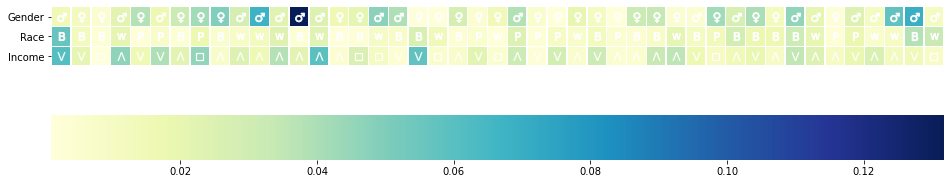

In [41]:
plot_hist(auc_std_ch, auc_fav_ch)

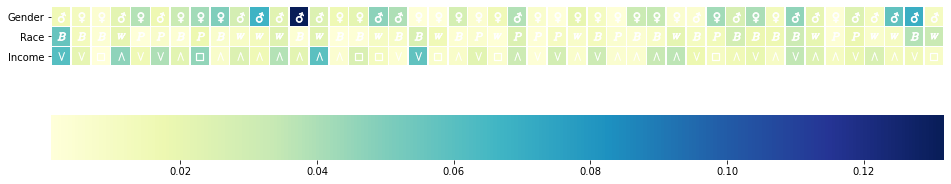

In [8]:
plot_hist(auc_std_ch, auc_fav_ch, cmax=0.2)

## 2. Ciências da Natureza

In [9]:
auc_std_cn, auc_fav_cn = all_groups_std_df('CN', ano)
#auc_std_cn

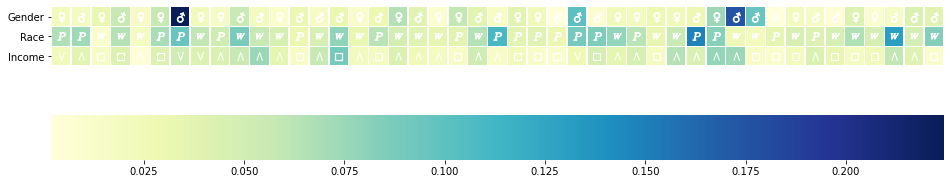

In [10]:
plot_hist(auc_std_cn, auc_fav_cn)

## 3. Matemática

In [11]:
auc_std_mt, auc_fav_mt = all_groups_std_df('MT', ano)
#auc_std_mt

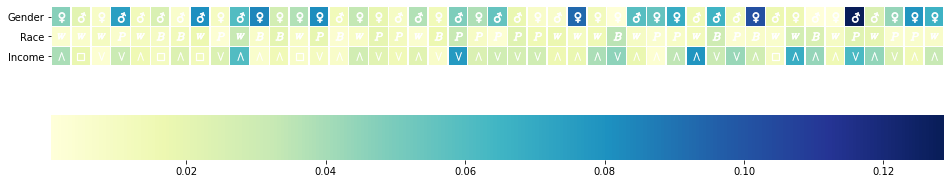

In [12]:
plot_hist(auc_std_mt, auc_fav_mt)

## 4. Linguagens e Códigos

In [13]:
item_ing = ['Item 55166', 'Item 54110', 'Item 23564', 'Item 31954', 'Item 118180']
item_esp = ['Item 96705', 'Item 118222','Item 39016', 'Item 118167', 'Item 48558']

auc_std_pt, auc_std_ing, auc_std_esp, auc_fav_pt, auc_fav_in, auc_fav_es = all_groups_std_df('LC', ano, item_ing, item_esp)

<AxesSubplot:>

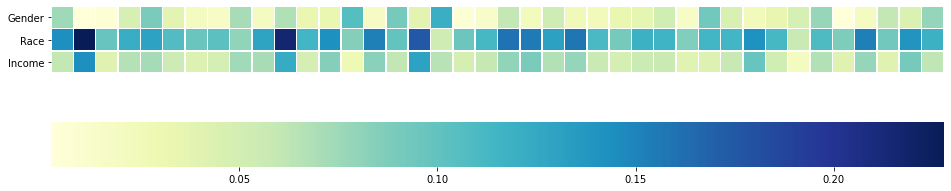

In [14]:
plt.figure(figsize=(16,6))
sns.heatmap(auc_std_pt.transpose(), xticklabels=False,
            linewidths=.5, square=True, 
            cmap="YlGnBu", 
            cbar_kws={"orientation": "horizontal"}
           )

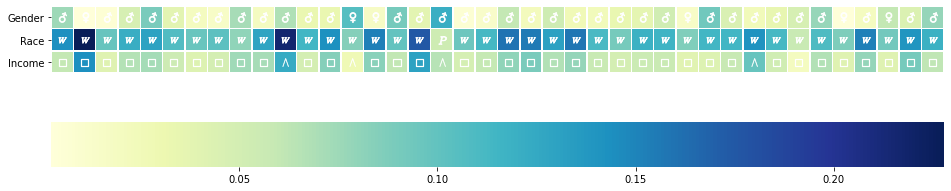

In [15]:
plot_hist(auc_std_pt, auc_fav_pt)

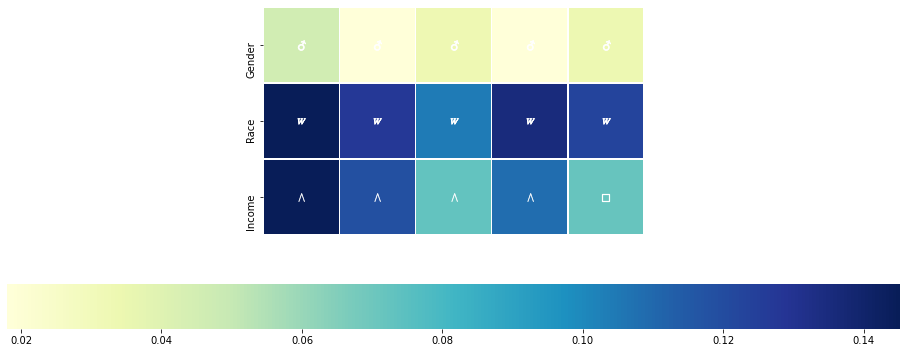

In [16]:
plot_hist(auc_std_ing, auc_fav_in)

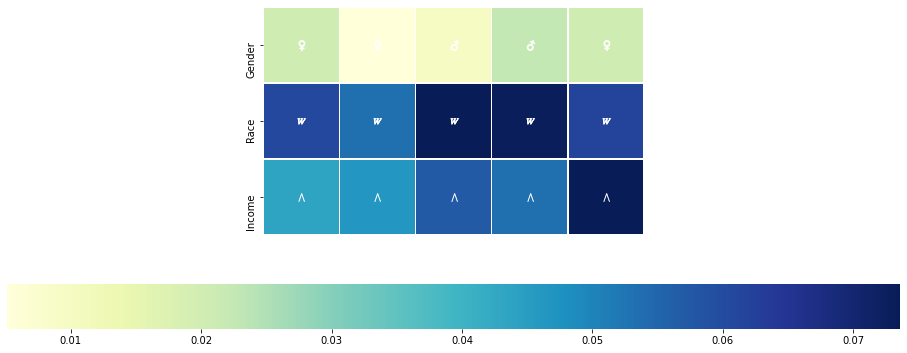

In [17]:
plot_hist(auc_std_esp, auc_fav_es)

# Heatmap

In [18]:
cmin = 0
cmax = max(auc_std_ch.max().max(), auc_std_cn.max().max(), auc_std_mt.max().max(),
           auc_std_esp.max().max(), auc_std_ing.max().max(), auc_std_pt.max().max())

In [51]:
marker_w = mlines.Line2D([], [], marker="$\u2640$", c='black', markersize=10, label='Woman', linestyle='None')
marker_m = mlines.Line2D([], [], marker="$\u2642$", c='black', markersize=10, label='Man', linestyle='None')

#marker_wh = mlines.Line2D([], [], marker='D', c='black', linewidth=0.8, label='White', linestyle='None')
#marker_br = mlines.Line2D([], [], marker='D', markerfacecolor='black', 
#                          c='black', fillstyle='left', linewidth=0.8, label='Pardo', linestyle='None')
#marker_bl = mlines.Line2D([], [], marker='D', c='black', fillstyle='none', linewidth=0.8, label='Black', linestyle='None')

marker_wh = mlines.Line2D([], [], marker='$\mathrm{\mathsf{W}}$', c='black', label='White', linestyle='None', markersize=8)
marker_br = mlines.Line2D([], [], marker='$\mathrm{\mathsf{P}}$', c='black', label='Pardo', linestyle='None', markersize=8)
marker_bl = mlines.Line2D([], [], marker='$\mathrm{\mathsf{B}}$', c='black', label='Black', linestyle='None', markersize=8)

marker_li = mlines.Line2D([], [], marker=r"$\bigvee$", c='black', label='Low income', linestyle='None',
                         markersize=8)
marker_mi = mlines.Line2D([], [], marker="o", fillstyle='none', c='black', markeredgewidth=1.7,
                          label='Medium income', linestyle='None', markersize=7)
marker_hi = mlines.Line2D([], [], marker=r"$\bigwedge$", c='black', label='High income', linestyle='None', 
                          markersize=8)

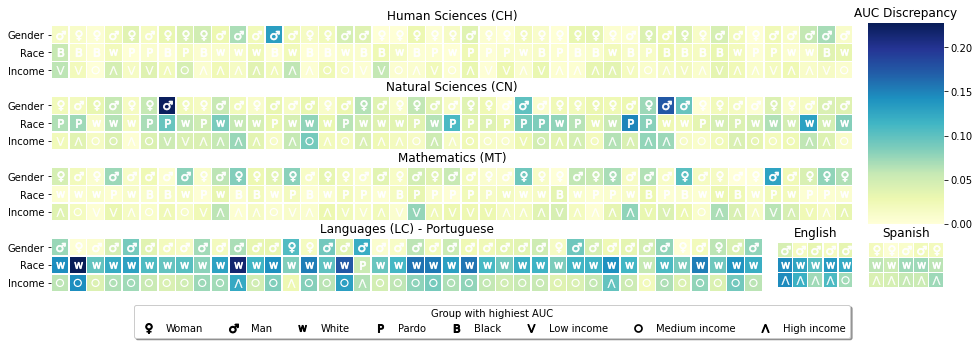

In [55]:
colors = 'YlGnBu'
fig = plt.figure(figsize=(16,5))

ax1 = plt.subplot2grid((4, 10), (0, 0), colspan=9)
ax2 = plt.subplot2grid((4, 10), (1, 0), colspan=9)
ax3 = plt.subplot2grid((4, 10), (2, 0), colspan=9)
ax4 = plt.subplot2grid((4, 10), (3, 0), colspan=8)
ax5 = plt.subplot2grid((4, 10), (3, 8))
ax6 = plt.subplot2grid((4, 10), (3, 9))
axc = plt.subplot2grid((4, 10), (0, 9), rowspan=3)

plot_hist(auc_std_ch, auc_fav_ch, colors=colors, cmax=cmax, ax=ax1)
ax1.set_title("Human Sciences (CH)")

plot_hist(auc_std_cn, auc_fav_cn, colors=colors, cmax=cmax, ax=ax2)
ax2.set_title("Natural Sciences (CN)")

plot_hist(auc_std_mt, auc_fav_mt, colors=colors, cmax=cmax, ax=ax3)
ax3.set_title("Mathematics (MT)")

plot_hist(auc_std_pt, auc_fav_pt, colors=colors, cmax=cmax, ax=ax4)
ax4.set_title("Languages (LC) - Portuguese")

plot_hist(auc_std_ing, auc_fav_in, colors=colors, cmax=cmax, ax=ax5, yticklabels=False)
ax5.set_title("English")

plot_hist(auc_std_esp, auc_fav_es, colors=colors, cmax=cmax, ax=ax6, yticklabels=False)
ax6.set_title("Spanish")

cmap = mpl.cm.get_cmap(colors)
norm = mpl.colors.Normalize(vmin=cmin, vmax=cmax)
cb1 = mpl.colorbar.ColorbarBase(axc, cmap=cmap,
                                norm=norm)
cb1.outline.set_visible(False)
axc.set_title("AUC Discrepancy")

ax4.legend(loc='upper center', bbox_to_anchor=(0.62, -0.15),
          fancybox=True, shadow=True, ncol=8, handles=[marker_w, marker_m,
                   marker_wh, marker_br, marker_bl,
                   marker_li, marker_mi, marker_hi],
          title='Group with highiest AUC')

#plt.tight_layout()
fig.patch.set_facecolor('white')
plt.savefig('HeatmapAUC2019.png', format='png', dpi=1200)